import libs


In [25]:
from flask import Flask, render_template, request, jsonify
import numpy as np
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import array as arr
import joblib

importing data


In [26]:
data = read_csv('Vegetable_market.csv')

app


In [27]:
app = Flask(__name__,template_folder='templates')

preprocessing


In [28]:
def preprocess_inp(data):
    data = data.copy()

    data['Vegetable'] = data['Vegetable'].replace({
        'cabage': 1,
        'radish': 2,
        'potato': 3,
        'tomato ': 4,
        'peas': 5,
        'pumkin': 6,
        'cucumber': 7,
        'pointed grourd ': 8,
        'Raddish': 9,
        'Bitter gourd': 10,
        'onion': 11,
        'ginger': 12,
        'garlic': 13,
        'califlower': 14,
        'brinjal': 15,
        'okra': 16,
        'chilly': 17,
    })

    data['Deasaster Happen in last 3month'] = data['Deasaster Happen in last 3month'].replace({'no' : 0,'yes' : 1})

    data['Month'] = data['Month'].replace({
        'jan' : 1,
        'feb':2 ,
        'mar':3,
        'apr':4,
        'may':5,
        'jun':6 ,
        'jul':7,
        'aug':8,
        'sep':9,
        'oct':10,
        'nov':11,
        'dec' : 12,
        ' ' : np.NaN
    })

    data['Month'] = data['Month'].fillna(data['Month'].mode()[0])

    data['Vegetable condition'] = data['Vegetable condition'].replace({'fresh' : 0,'avarage':1,'scrap':2})

    data['Season'] = data['Season'].replace({'winter' : 0,'summer':1,'spring':2,'autumn': 3,'monsoon':4})
    
    return data

In [29]:
input = preprocess_inp(data)


In [30]:
y = input['Price per kg'].values
X = input.drop(['Price per kg'],axis=1).values

In [31]:
X

array([[ 3.,  0.,  1., 15.,  0.,  0.],
       [ 4.,  0.,  1., 15.,  0.,  0.],
       [ 5.,  0.,  1., 15.,  0.,  0.],
       [ 6.,  0.,  1., 15.,  0.,  0.],
       [ 7.,  0.,  1., 15.,  0.,  0.],
       [ 8.,  0.,  1., 15.,  1.,  0.],
       [ 9.,  0.,  1., 15.,  0.,  0.],
       [10.,  0.,  1., 15.,  0.,  0.],
       [11.,  0.,  1., 15.,  0.,  0.],
       [ 4.,  0.,  1., 15.,  0.,  0.],
       [13.,  0.,  1., 15.,  0.,  0.],
       [ 1.,  0.,  1., 15.,  1.,  0.],
       [14.,  0.,  1., 15.,  0.,  0.],
       [17.,  0.,  1., 15.,  0.,  0.],
       [16.,  0.,  1., 15.,  0.,  2.],
       [ 6.,  0.,  1., 15.,  0.,  0.],
       [15.,  0.,  1., 15.,  0.,  0.],
       [12.,  0.,  1., 15.,  0.,  0.],
       [ 3.,  1.,  4., 32.,  0.,  0.],
       [ 5.,  1.,  4., 33.,  0.,  0.],
       [ 2.,  1.,  4., 32.,  0.,  0.],
       [ 4.,  1.,  4., 35.,  0.,  1.],
       [ 1.,  1.,  4., 32.,  0.,  0.],
       [14.,  1.,  4., 37.,  0.,  0.],
       [ 8.,  4.,  7., 30.,  0.,  0.],
       [ 9.,  1.,  4., 37

In [32]:
y

array([ 20,  50,  70,  25,  20, 130,  10,  35,  35,  45, 150,  45,  20,
        80,  30,  20,  70,  20,  25, 100,  30,  80,  50,  60,  25,  70,
        70,  20, 130, 170,  40,  20, 200,  15,  10,  40, 200,  40, 250,
        90,  16,  30,  40,  15,  12,  50,  15,  25,  28,  35, 120,  75,
        18,  80,  40,  20,  70,  70,  25, 100,  30, 120,  50,  60,  25,
        80,  15,  45, 190,  50, 210, 130,  10,  25,  42,  20,  15,  55,
        20,  29,  32,  20, 132,  60,  21,  75,  35,  19,  32,  90,  22,
        35,  21,  90,  33,  55,  30,  45, 170, 150,  24,  30,  35,  23,
        21,  53,  27,  32,  24,  22, 123,  55,  21,  90,  25,  21,  33,
        88,  24,  33,   9], dtype=int64)

In [33]:
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [34]:
y_test

array([ 30,  45, 170, 150,  24,  30,  35,  23,  21,  53,  27,  32,  24,
        22, 123,  55,  21,  90,  25,  21,  33,  88,  24,  33,   9],
      dtype=int64)

Training

In [60]:
model = Sequential()
model.add(LSTM(50,input_shape=(X_train.shape[1],1)))
model.add(Dense(units=1))

In [48]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50)                10400     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [55]:
model.fit(X_train,y_train,epochs=2500,batch_size=32,verbose=1)

Epoch 1/2500
3/3 [==============================] - 0s 34ms/step - loss: 4595.7524
Epoch 2/2500
3/3 [==============================] - 0s 7ms/step - loss: 4567.7246
Epoch 3/2500
3/3 [==============================] - 0s 6ms/step - loss: 4537.8457
Epoch 4/2500
3/3 [==============================] - 0s 20ms/step - loss: 4513.9463
Epoch 5/2500
3/3 [==============================] - 0s 15ms/step - loss: 4488.6226
Epoch 6/2500
3/3 [==============================] - 0s 10ms/step - loss: 4465.4370
Epoch 7/2500
3/3 [==============================] - 0s 9ms/step - loss: 4441.7109
Epoch 8/2500
3/3 [==============================] - 0s 7ms/step - loss: 4419.6025
Epoch 9/2500
3/3 [==============================] - 0s 7ms/step - loss: 4398.3120
Epoch 10/2500
3/3 [==============================] - 0s 14ms/step - loss: 4376.5601
Epoch 11/2500
3/3 [==============================] - 0s 6ms/step - loss: 4358.1426
Epoch 12/2500
3/3 [==============================] - 0s 19ms/step - loss: 4337.4722
Epoch 1

In [56]:
trainpred = model.predict(X_train)
testpred = model.predict(X_test)

1/1 [==============================] - 0s 81ms/step


In [57]:
trainrmse = np.sqrt(mean_squared_error(y_train,trainpred))
testrmse = np.sqrt(mean_squared_error(y_test,testpred))
print('Train RMSE: ', trainrmse)  
print('Test RMSE: ', testrmse)

Train RMSE:  13.922912706189138
Test RMSE:  16.74677320776127


In [58]:
joblib.dump(model, "model2/model.sav")

['model2/model.sav']

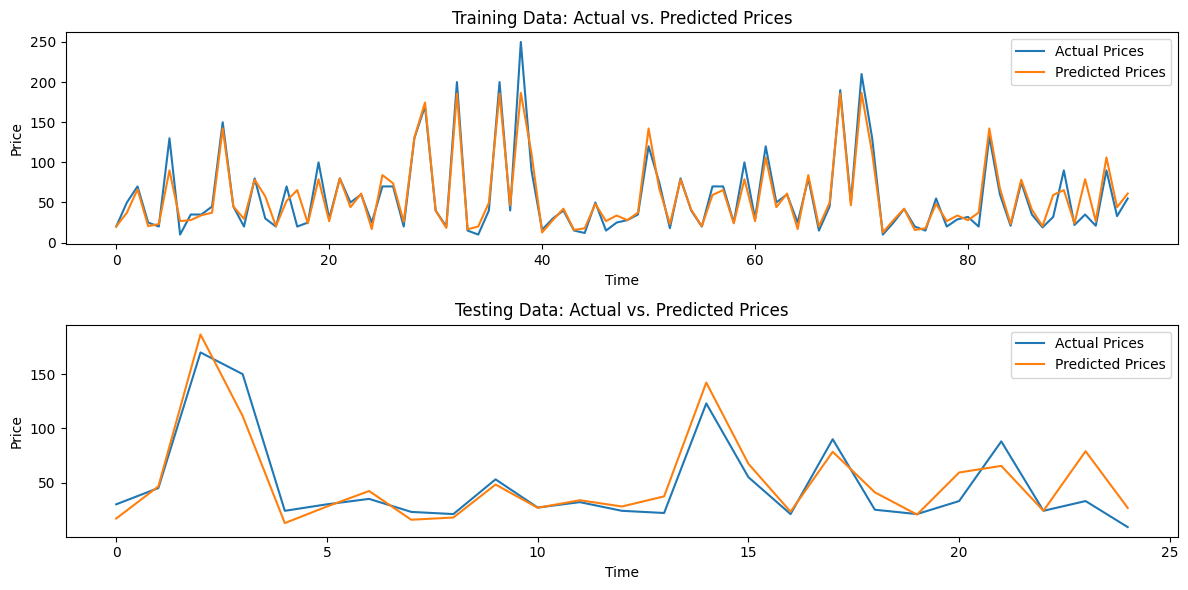

In [59]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(2, 1, 1)
plt.plot(y_train, label='Actual Prices')
plt.plot(trainpred, label='Predicted Prices')
plt.title('Training Data: Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plot testing data
plt.subplot(2, 1, 2)
plt.plot(y_test, label='Actual Prices')
plt.plot(testpred, label='Predicted Prices')
plt.title('Testing Data: Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

input check

In [21]:
inp = pd.read_csv('new.csv')

veg  = inp['Vegetable']

inpt = preprocess_inp(inp)
 
predicted_price = model.predict(inpt)

for i in range (0,15):
    print("For : ",veg[i] ," - " ,"Predicted Price :", predicted_price[i][0])

1/1 [==============================] - 1s 885ms/step
For :  potato  -  Predicted Price : 19.625402
For :  tomato   -  Predicted Price : 36.8972
For :  pointed grourd   -  Predicted Price : 122.83481
For :  Raddish  -  Predicted Price : 25.209206
For :  Bitter gourd  -  Predicted Price : 35.97304
For :  onion  -  Predicted Price : 35.505527
For :  tomato   -  Predicted Price : 36.8972
For :  garlic  -  Predicted Price : 134.66019
For :  cabage  -  Predicted Price : 44.951527
For :  califlower  -  Predicted Price : 65.48417
For :  chilly  -  Predicted Price : 57.735973
For :  okra  -  Predicted Price : 61.865498
For :  pumkin  -  Predicted Price : 21.639935
For :  brinjal  -  Predicted Price : 60.511658
For :  ginger  -  Predicted Price : 58.204742
